✅ Chart saved to /workspaces/Nutrition_Tracker/src/graphs/graph.png


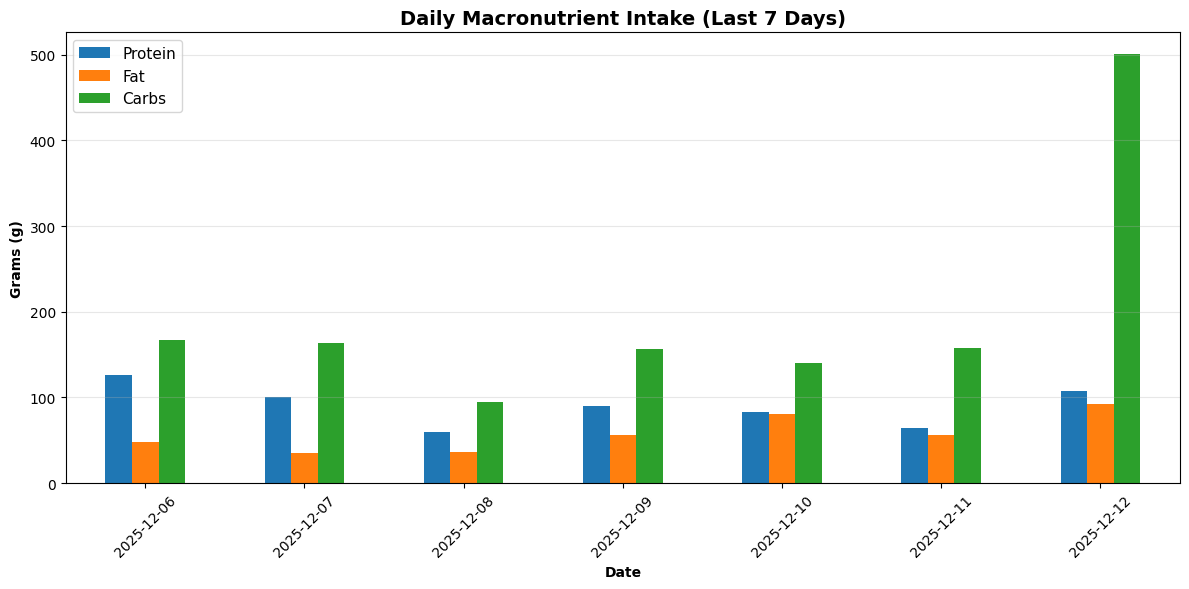

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import data

# Create graphs directory if it doesn't exist
graphs_dir = os.path.join(os.getcwd(), "graphs")
os.makedirs(graphs_dir, exist_ok=True)
graph_file_path = os.path.join(graphs_dir, "graph.png")

# 1. Load and Process
entries = data.get_entries_within_week()

if not entries:
    print("❌ No entries found in the last 7 days")
else:
    df = pd.DataFrame(entries)
    
    # Convert types and handle errors
    df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce')
    df['Calories'] = pd.to_numeric(df['Calories'], errors='coerce')
    df['Protein'] = pd.to_numeric(df['Protein'], errors='coerce')
    df['Fat'] = pd.to_numeric(df['Fat'], errors='coerce')
    df['Carbs'] = pd.to_numeric(df['Carbs'], errors='coerce')
    df.dropna(subset=['DateTime', 'Calories'], inplace=True)
    
    if df.empty:
        print("❌ No valid entries found")
    else:
        # Group by Date
        daily = df.groupby(df['DateTime'].dt.date)[['Calories', 'Protein', 'Fat', 'Carbs']].sum()
        
        # 2. Plotting (Macronutrients only)
        fig, ax = plt.subplots(figsize=(12, 6))
        
        # Plot: Macronutrients (grouped bar)
        daily[['Protein', 'Fat', 'Carbs']].plot(kind='bar', ax=ax, rot=45)
        ax.set_title('Daily Macronutrient Intake (Last 7 Days)', fontweight='bold', fontsize=14)
        ax.set_ylabel('Grams (g)', fontweight='bold')
        ax.set_xlabel('Date', fontweight='bold')
        ax.legend(['Protein', 'Fat', 'Carbs'], loc='upper left', fontsize=11)
        ax.grid(axis='y', alpha=0.3)
        
        plt.tight_layout()
        plt.savefig(graph_file_path)
        print(f"✅ Chart saved to {graph_file_path}")
    
        
        plt.show()